In [ ]:
#connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#importing required Libraries
import numpy as np
import tensorflow
import keras
import os
import glob
from skimage import io
import skimage
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.models import Model
from keras.layers import Activation
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import decode_predictions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from keras.models import model_from_json
import itertools
import matplotlib.pyplot as plt
import time
import pandas as pd
%matplotlib inline

In [ ]:
import os
dataset_pth = '/content/gdrive/MyDrive/priyansh30001/datasetss'

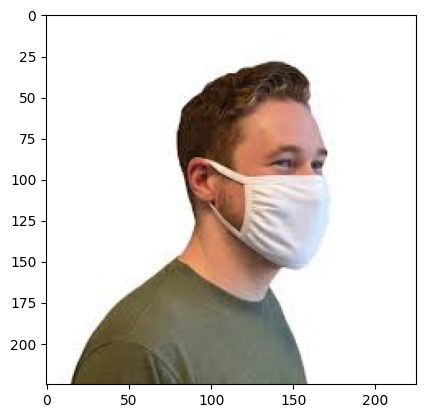

In [ ]:
# accessing an image file from the dataset classes
image = io.imread('/content/gdrive/MyDrive/priyansh30001/datasetss/test/with_mask_2876.jpg')

# plotting the original image
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)


Data Preprocessing
Now that we’re done with importing libraries and data, let’s proceed to data preprocessing.

Since images exist in different formats, i.e., natural, fake, grayscale, etc., we need to take into consideration and standardize them before feeding them into a neural network.

In this tutorial, we shall look at the following image preprocessing techniques:

Grayscale conversion
Normalisation
Data Augmentation
Image standardization
Before we start exploring preprocessing techniques, let’s first explore the RGB channels of our original image;

Text(0.5, 0.98, 'Original & RGB image channels')

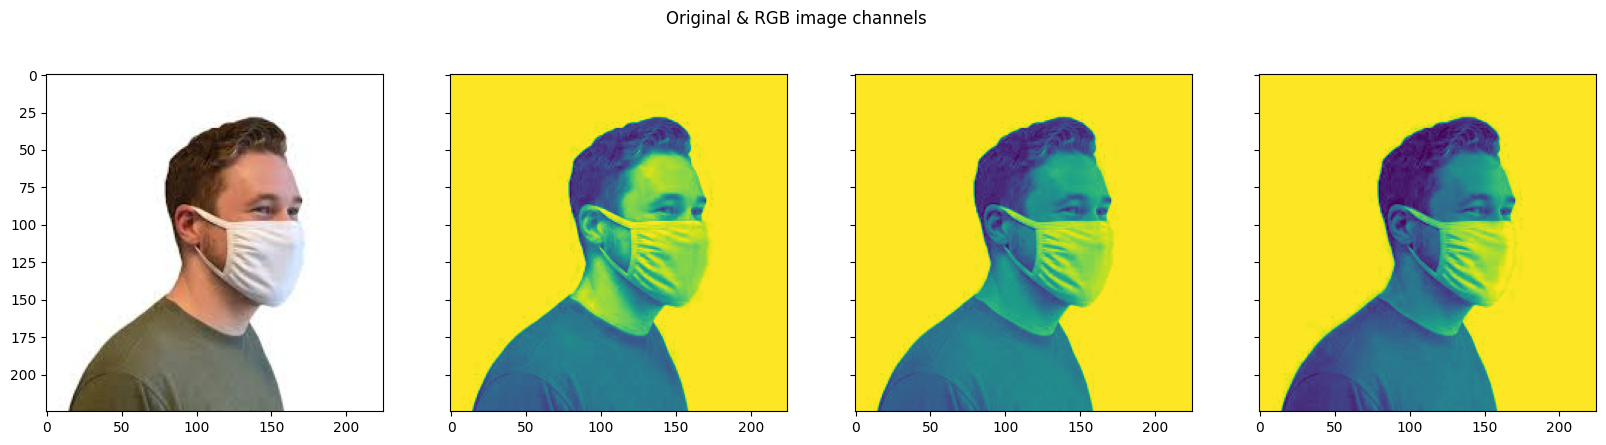

In [ ]:
# plotting the original image and the RGB channels

i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20)

im1.imshow(image)  #Original image
im2.imshow(image[:, : , 0]) #Red
im3.imshow(image[:, : , 1]) #Green
im4.imshow(image[:, : , 2]) #Blue
i.suptitle('Original & RGB image channels')

Grayscale conversion
Grayscale is simply converting images from colored to black and white. It is normally used to reduce computation complexity in machine learning algorithms.

Since most pictures don’t need color to be recognized, it is wise to use grayscale, which reduces the number of pixels in an image, thus, reducing the computations required.

Execute the code below to convert the original image to grayscale:

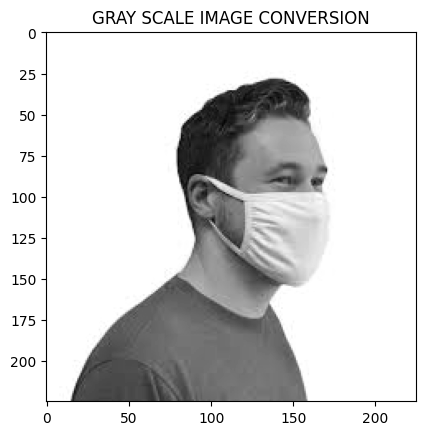

In [ ]:
# gray scale conversion
plt.title('GRAY SCALE IMAGE CONVERSION')
gray_image = skimage.color.rgb2gray(image)
plt.imshow(gray_image, cmap = 'gray')


Normalization
Also referred to as data re-scaling, it is the process of projecting image data pixels (intensity) to a predefined range (usually (0,1) or (-1, 1)). This is commonly used on different data formats, and you want to normalize all of them to apply the same algorithms over them.

Normalization is usually applied to convert an image’s pixel values to a typical or more familiar sense.

Its benefits include:

Fairness across all images - For example, scaling all images to an equal range of [0,1] or [-1,1] allows all images to contribute equally to the total loss rather than when other images have high and low pixels ranges give strong and weak loss, respectively.

Provides a standard learning rate - Since high pixel images require a low learning rate and low pixel images high learning rate, re-scaling helps provide a standard learning rate for all images.

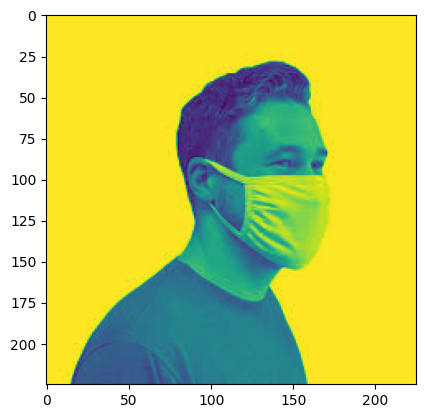

In [ ]:
# Normalize image
norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
plt.imshow(norm_image)
plt.title('GRAY SCALE IMAGE CONVERSION')

Data augmentation
Data augmentation is the process of making minor alterations to existing data to increase its diversity without collecting new data.

It is a technique used for enlarging a dataset. Standard data augmentation techniques include horizontal & vertical flipping, rotation, cropping, shearing, etc.

Performing data augmentation helps in preventing a neural network from learning irrelevant features. This results in better model performance.

Standard data augmentation techniques include horizontal & vertical flipping, rotation, cropping, shearing, etc.

There are two types of augmentation:

Offline augmentation - Used for small datasets. It is applied in the data preprocessing step. We will be covering this augmentation in this tutorial.

Online augmentation- Used for large datasets. It is normally applied in real-time.

For this tutorial, we shall use Keras’s ImageDataGenerator class to augment our data. This is because it provides a quick and easy way to augment your images.

In addition, it supports augmentation techniques such as flips, rotations, brightness change, etc.

Let’s now look at the most used data augmentation techniques:

Shifting
This is the process of shifting image pixels horizontally or vertically.

Let’s look at an example below that shifts horizontally:

In [ ]:

!pip install keras_preprocessing

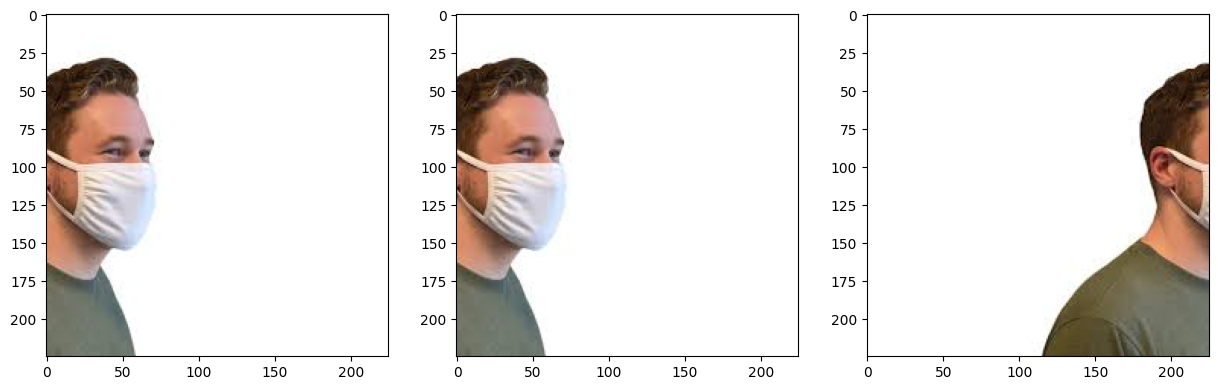

In [ ]:
# import libraries

from numpy import expand_dims
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import ImageDataGenerator

# convert to numpy array
data = img_to_array(image)

# expand dimension to one sample
samples = expand_dims(image, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[50,100])

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    images = next(it)[0].astype('uint8')

    # plot image
    im[i].imshow(images)

Flipping¶
This reverses the rows or columns of pixels in either vertical or horizontal cases, respectively.

Let’s do a random flip with both horizontal and vertical flips. From the code above, change the ImageDataGenerator parameters as shown below:

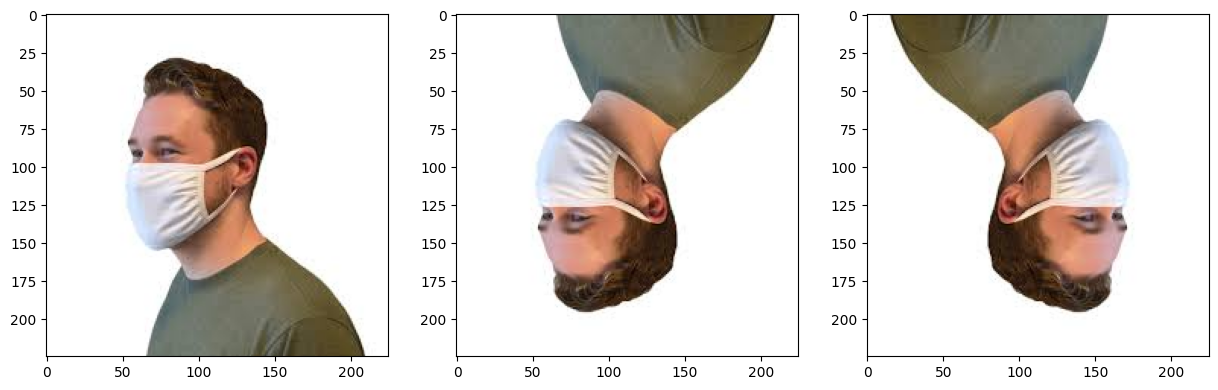

In [ ]:
# ImageDataGenerator for flipping
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    images = next(it)[0].astype('uint8')

    # plot image
    im[i].imshow(images)

Rotation
This process involves rotating an image by a specified degree.

From the code above, change the ImageDataGenerator parameters, as shown below:

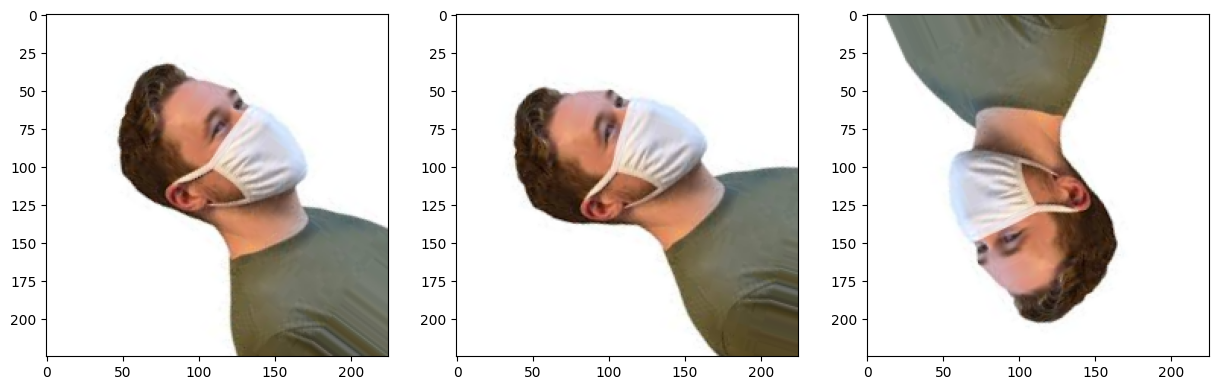

In [ ]:
# ImageDataGenerator for rotation
datagen = ImageDataGenerator(rotation_range=360, fill_mode='nearest')

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    images = next(it)[0].astype('uint8')

    # plot image
    im[i].imshow(images)

Changing brightness
This is the process of increasing or decreasing image contrast.

From the code above, change the ImageDataGenerator parameters, as shown below:

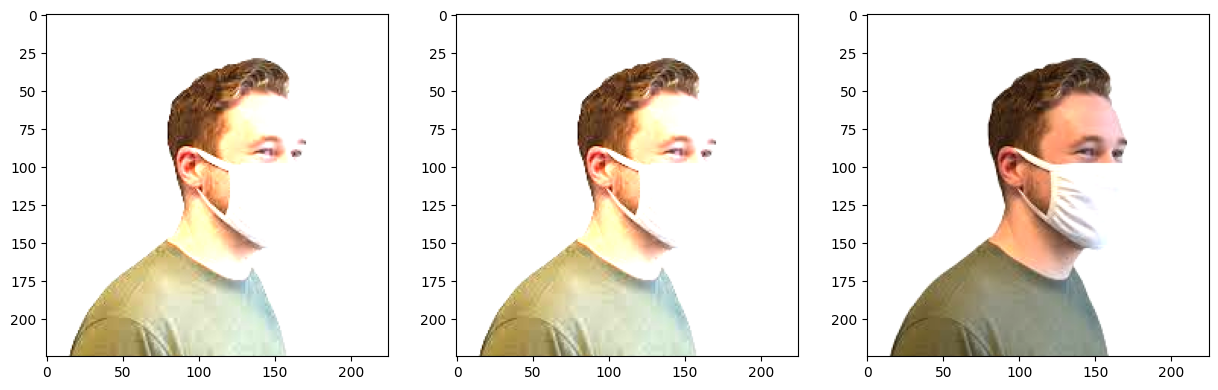

In [ ]:
# ImageDataGenerator for brightness
datagen = ImageDataGenerator(brightness_range=[0.5,2.0])
# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    images = next(it)[0].astype('uint8')

    # plot image
    im[i].imshow(images)


Standardizing images
Standardization is a method that scales and preprocesses images to have similar heights and widths. It re-scales data to have a standard deviation of 1 (unit variance) and a mean of 0.

Standardization helps to improve the quality and consistency of data.

From the code above, change the ImageDataGenerator parameters as shown below:

/usr/local/lib/python3.10/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.10/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


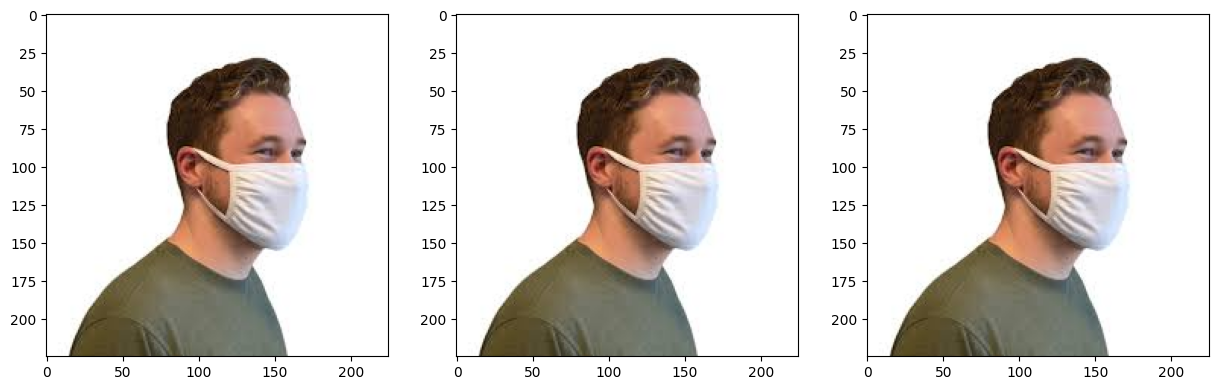

In [ ]:
# creating the image data generator to standardize images
datagen = ImageDataGenerator(featurewise_center =True,
      featurewise_std_normalization = True)

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    images = next(it)[0].astype('uint8')

    # plot image
    im[i].imshow(images)

In [ ]:
# Standard data science libraries
import psutil
import humanize
import os
from IPython.display import display_html

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/content/gdrive/MyDrive/priyansh30001/datasetss/"))
dataDirectory= "/content/gdrive/MyDrive/priyansh30001/datasetss/"
print(os.listdir(dataDirectory))



# Any results you write to the current directory are saved as output.

['train', 'test']
['train', 'test']


In [ ]:
print(os.listdir("/content/gdrive/MyDrive/priyansh30001/datasetss"))

['train', 'test']


In [ ]:
!rm -r ~/.keras
!mkdir ~/.keras
!mkdir ~/.keras/models
# not enough space for both
#!cp ../input/keras-pretrained-models/* ~/.keras/models/
#!cp ../input/vgg19/* ~/.keras/models
!cp ../input/keras-pretrained-models/*notop* ~/.keras/models/
!cp ../input/keras-pretrained-models/imagenet_class_index.json ~/.keras/models/
#!cp ../input/keras-pretrained-models/resnet50* ~/.keras/models/

cp: cannot stat '../input/keras-pretrained-models/*notop*': No such file or directory
cp: cannot stat '../input/keras-pretrained-models/imagenet_class_index.json': No such file or directory


In [ ]:
train_path = dataDirectory
test_path  = dataDirectory
print(os.listdir(train_path ))
print(os.listdir(test_path ))

['train', 'test']
['train', 'test']


In [ ]:
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest',
    validation_split=0.2) # set validation split

In [ ]:
selectedClasses = ['train', 'test']

In [ ]:
batchSize=32


train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batchSize,
    classes=selectedClasses,
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_path, # same directory as training data
    target_size=(224, 224),
    batch_size=batchSize,
    classes=selectedClasses,
    subset='validation') # set as validation data

test_generator = ImageDataGenerator().flow_from_directory(
    test_path,
    target_size=(224,224),
    classes=selectedClasses,
    shuffle= False,
    batch_size = batchSize)# set as test data

Found 391 images belonging to 2 classes.
Found 96 images belonging to 2 classes.
Found 487 images belonging to 2 classes.


In [ ]:
print ("In train_generator ")
for cls in range(len (train_generator.class_indices)):
    print(selectedClasses[cls],":\t",list(train_generator.classes).count(cls))
print ("")

print ("In validation_generator ")
for cls in range(len (validation_generator.class_indices)):
    print(selectedClasses[cls],":\t",list(validation_generator.classes).count(cls))
print ("")

print ("In test_generator ")
for cls in range(len (test_generator.class_indices)):
    print(selectedClasses[cls],":\t",list(test_generator.classes).count(cls))

In train_generator 
train :	 195
test :	 196

In validation_generator 
train :	 48
test :	 48

In test_generator 
train :	 243
test :	 244


In [ ]:
#plots images with labels within jupyter notebook
def plots(ims, figsize = (22,22), rows=4, interp=False, titles=None, maxNum = 9):
    if type(ims[0] is np.ndarray):
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))

    f = plt.figure(figsize=figsize)
    #cols = len(ims) //rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    cols = maxNum // rows if maxNum % 2 == 0 else maxNum//rows + 1
    #for i in range(len(ims)):
    for i in range(maxNum):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=20)
        plt.imshow(ims[i], interpolation = None if interp else 'none')

In [ ]:
train_generator.reset()
imgs, labels = train_generator.next()

#print(labels)

labelNames=[]
labelIndices=[np.where(r==1)[0][0] for r in labels]
#print(labelIndices)

for ind in labelIndices:
    for labelName,labelIndex in train_generator.class_indices.items():
        if labelIndex == ind:
            #print (labelName)
            labelNames.append(labelName)

In [ ]:
#InceptionV3
from tensorflow.keras.models import Model
base_model = InceptionV3(weights='imagenet',
                                include_top=False,
                                input_shape=(224, 224,3))
base_model.trainable = False

x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dropout(0.5)(x)
# and a sofymax/logistic layer -- we have 6 classes
predictions = Dense(len(selectedClasses), activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)


model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalization_94

In [ ]:
#Atutomatic rename with epoch number and val accuracy:
#filepath="checkpoints/weights-improvement-epeoch-{epoch:02d}-val_acc-{val_acc:.2f}.hdf5"



modelName= "InceptionTutorial"
#save the best weights over the same file with the model name

#filepath="checkpoints/"+modelName+"_bestweights.hdf5"
filepath=modelName+"_bestweights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
stepsPerEpoch= (train_generator.samples+ (batchSize-1)) // batchSize
print("stepsPerEpoch: ", stepsPerEpoch)

validationSteps=(validation_generator.samples+ (batchSize-1)) // batchSize
print("validationSteps: ", validationSteps)


#validationSteps=(test_generator.samples+ (batchSize-1)) // batchSize
#print("validationSteps: ", validationSteps)

stepsPerEpoch:  13
validationSteps:  3


In [ ]:
train_generator.reset()
validation_generator.reset()

# Fit the model
history = model.fit_generator(
    train_generator,
    validation_data = validation_generator,
    epochs = 10,
    steps_per_epoch = stepsPerEpoch,
    validation_steps= validationSteps,
    callbacks=callbacks_list,
    verbose=1)

<ipython-input-44-d902a5eaac79>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
10/13 [======================>.......] - ETA: 15s - loss: 25.0801 - accuracy: 0.4983

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


13/13 [==============================] - ETA: 0s - loss: 24.1003 - accuracy: 0.4910

13/13 [==============================] - 113s 7s/step - loss: 24.1003 - accuracy: 0.4910 - val_loss: 18.4196 - val_accuracy: 0.5000
Epoch 2/10
13/13 [==============================] - ETA: 0s - loss: 22.0757 - accuracy: 0.5192

13/13 [==============================] - 108s 8s/step - loss: 22.0757 - accuracy: 0.5192 - val_loss: 14.5514 - val_accuracy: 0.4896
Epoch 3/10
13/13 [==============================] - ETA: 0s - loss: 19.8533 - accuracy: 0.4910

13/13 [==============================] - 91s 6s/step - loss: 19.8533 - accuracy: 0.4910 - val_loss: 5.3121 - val_accuracy: 0.5104
Epoch 4/10
13/13 [==============================] - ETA: 0s - loss: 17.7101 - accuracy: 0.5013

13/13 [==============================] - 79s 6s/step - loss: 17.7101 - accuracy: 0.5013 - val_loss: 5.1862 - val_accuracy: 0.5417
Epoch 5/10
13/13 [==============================] - ETA: 0s - loss: 13.3787 - accuracy: 0.5115

13/13 [==============================] - 80s 6s/step - loss: 13.3787 - accuracy: 0.5115 - val_loss: 3.7951 - val_accuracy: 0.5312
Epoch 6/10
13/13 [==============================] - ETA: 0s - loss: 15.4762 - accuracy: 0.4629

13/13 [==============================] - 67s 5s/step - loss: 15.4762 - accuracy: 0.4629 - val_loss: 5.1456 - val_accuracy: 0.5521
Epoch 7/10
13/13 [==============================] - ETA: 0s - loss: 12.9496 - accuracy: 0.4987

13/13 [==============================] - 78s 6s/step - loss: 12.9496 - accuracy: 0.4987 - val_loss: 3.5227 - val_accuracy: 0.5104
Epoch 8/10
13/13 [==============================] - ETA: 0s - loss: 13.3949 - accuracy: 0.5703

13/13 [==============================] - 81s 7s/step - loss: 13.3949 - accuracy: 0.5703 - val_loss: 11.6841 - val_accuracy: 0.4896
Epoch 9/10
13/13 [==============================] - ETA: 0s - loss: 12.3276 - accuracy: 0.5269

13/13 [==============================] - 80s 6s/step - loss: 12.3276 - accuracy: 0.5269 - val_loss: 7.9504 - val_accuracy: 0.5104
Epoch 10/10
13/13 [==============================] - ETA: 0s - loss: 11.3558 - accuracy: 0.5345

13/13 [==============================] - 78s 6s/step - loss: 11.3558 - accuracy: 0.5345 - val_loss: 7.4487 - val_accuracy: 0.5208


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


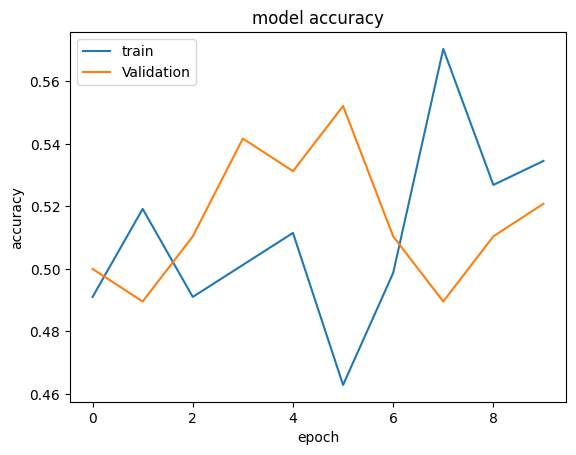

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

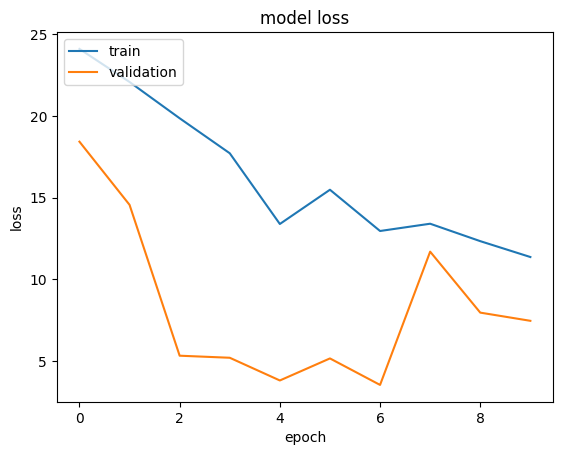

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
timestr = time.strftime("%Y%m%d_%H%M%S")

# serialize model to JSON
model_json = model.to_json()
with open(timestr+"_"+modelName+"_MODEL_3"+".json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(timestr+"_"+modelName+"_3_LAST_WEIGHTS_"+".h5")

In [ ]:
validation_generator.reset()
score = model.evaluate_generator(validation_generator, (validation_generator.samples + (batchSize-1)) //batchSize)
print("For validation data set; Loss: ",score[0]," Accuracy: ", score[1])

<ipython-input-48-217da5d4d1b4>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(validation_generator, (validation_generator.samples + (batchSize-1)) //batchSize)


For validation data set; Loss:  7.110265254974365  Accuracy:  0.5


In [ ]:
test_generator.reset()
score = model.evaluate_generator(test_generator, (test_generator.samples + (batchSize-1)) // batchSize)
print("For test data set; Loss: ",score[0]," Accuracy: ", score[1])

<ipython-input-49-48f06eaa3567>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator, (test_generator.samples + (batchSize-1)) // batchSize)


For test data set; Loss:  6.454906463623047  Accuracy:  0.521560549736023


In [ ]:
test_generator.reset()
testStep = (test_generator.samples + (batchSize-1)) // batchSize
print("testStep: ", testStep)
predictions = model.predict_generator(test_generator, steps = testStep ,  verbose = 1)
len(predictions)

testStep:  16


<ipython-input-195-5945c9e482fa>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps = testStep ,  verbose = 1)


 2/16 [==>...........................] - ETA: 57s 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/16 [==============================] - 63s 4s/step


487

In [ ]:
len(predictions)

TypeError: Keras symbolic inputs/outputs do not implement `__len__`. You may be trying to pass Keras symbolic inputs/outputs to a TF API that does not register dispatching, preventing Keras from automatically converting the API call to a lambda layer in the Functional Model. This error will also get raised if you try asserting a symbolic input/output directly.

In [ ]:
predicted_class_indices=np.argmax(predictions,axis=1)
print(predicted_class_indices)
len(predicted_class_indices)

TypeError: You are passing KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name=None), name='dense_1/Softmax:0', description="created by layer 'dense_1'"), an intermediate Keras symbolic input/output, to a TF API that does not allow registering custom dispatchers, such as `tf.cond`, `tf.function`, gradient tapes, or `tf.map_fn`. Keras Functional model construction only supports TF API calls that *do* support dispatching, such as `tf.math.add` or `tf.reshape`. Other APIs cannot be called directly on symbolic Kerasinputs/outputs. You can work around this limitation by putting the operation in a custom Keras layer `call` and calling that layer on this symbolic input/output.

In [ ]:
labels = (test_generator.class_indices)
print(labels)

{'train': 0, 'test': 1}


In [ ]:
print(predicted_class_indices)
len(predictedLables)


[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 1 0]


487

In [ ]:
predictedLables= [labels[k] for k in predicted_class_indices]
print(predictedLables)
len(predictedLables)


KeyError: 0

In [ ]:
actualLables = [labels[k] for k in test_generator.classes]

KeyError: 0

In [ ]:
#actualLables= [labels[1,0] for k in test_generator.classes]
print(actualLables)
len(actualLables)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

487

In [ ]:
accuracy_score(actualLables, predictedLables)

0.0

In [ ]:
matrix = confusion_matrix(actualLables, predictedLables)
print(labels)
matrix

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


array([[  0,   0],
       [487,   0]])

In [ ]:
recall_score( actualLables, predictedLables,average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [ ]:
precision_score( actualLables, predictedLables,average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [ ]:
#Prepared code that is taken from SKLearn Website, Creates Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[  0   0]
 [487   0]]


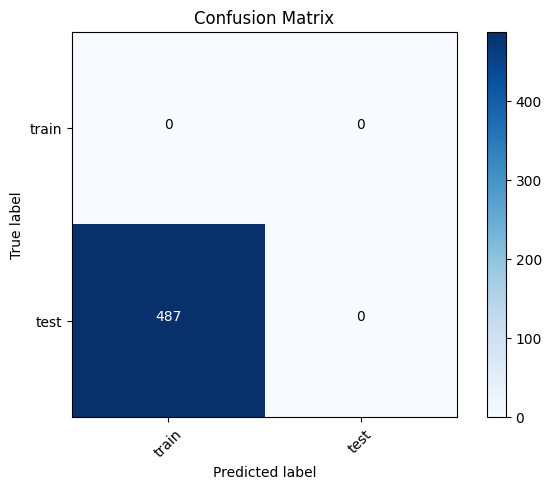

In [ ]:
cm_plot_labels = selectedClasses
plot_confusion_matrix(matrix,cm_plot_labels, normalize=False
                      , title = 'Confusion Matrix')

In [ ]:
filenames=test_generator.filenames
directory= test_generator.directory
results=pd.DataFrame({"Directory":directory,
                      "Filename":filenames,
                      "Predictions":predictedLables,
                     "Actuals": actualLables })
results.to_csv("results.csv",index=False)



In [ ]:
print("NOTEBOOK COMPLETED")

NOTEBOOK COMPLETED
